# Algerian Fires Datasets (Data Cleaning)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
fire_df = pd.read_csv("./algerianforest.csv")
# we will predict temp since its linear regression we will remove classes
fire_df.columns = fire_df.columns.str.strip()
# fire_df.drop("Classes", axis=1, inplace=True)
fire_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [55]:
fire_df[fire_df.isnull().any(axis=1)]
# Sidi-Bel Abbes Region Datase region dependent

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [56]:
fire_df.loc[:122, "Region"] = 0
fire_df.loc[122:, "Region"] = 1
fire_df = fire_df
fire_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [57]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [58]:
fire_df[["Region"]] = fire_df[["Region"]].astype(int) 

In [59]:
fire_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [60]:
fire_df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [61]:
# fire_df.drop(fire_df[fire_df['day'] == "Sidi-Bel Abbes Region Dataset"].index, inplace=True)
fire_df = fire_df.dropna().reset_index(drop=True)

In [62]:
fire_df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [63]:
# fire_df.iloc[[122]]
fire_df = fire_df.drop(122).reset_index(drop=True)
fire_df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [64]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [65]:
# since fire_df.corr() is not working beacuse of object datatype of column
fire_df.columns
# DC = "14.6 9" is dropped beacuse it is not compatible
fire_df.drop(fire_df[fire_df['DC'] == "14.6 9"].index, inplace=True)

In [66]:
fire_df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = fire_df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

# fire_df.info()

In [67]:
# , 'DC', 'ISI', 'BUI', 'FWI'
fire_df[['Rain', 'FFMC','DMC','DC', 'ISI', 'BUI', 'FWI']] = fire_df[['Rain', 'FFMC','DMC','DC', 'ISI', 'BUI', 'FWI']] .astype(float)

In [68]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [69]:
# fire_df.corr()


In [70]:
# import seaborn as sns
# sns.heatmap(fire_df)

In [71]:
# all datsets cleaning is done save it some csv file
fire_df.to_csv("newalgerianfire.csv", index=False)

# Working on new Datsets (After Cleaning) (EDA Exploaratory Data Analysis)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
fire_df = pd.read_csv("./newalgerianfire.csv")
fire_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [74]:
fire_df.drop(columns=["day", "month", "year"], axis=1, inplace=True)
fire_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [75]:
fire_df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [76]:
fire_df["Classes"] = np.where(fire_df["Classes"].str.contains("not fire"),0,1) 

In [77]:
fire_df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [78]:
import seaborn as sns
# sns.pairplot(fire_df)

In [79]:
fire_df.corr()["Temperature"]

Temperature    1.000000
RH            -0.651400
Ws            -0.284510
Rain          -0.326492
FFMC           0.676568
DMC            0.485687
DC             0.376284
ISI            0.603871
BUI            0.459789
FWI            0.566670
Classes        0.516015
Region         0.269555
Name: Temperature, dtype: float64

In [80]:
# sns.heatmap(fire_df.corr(),annot=True)

# # We can do EDA 
# dftemp = fire_df.loc[fire_df["Region"] == 0]
# # plt.subplots(figsize = (13,6))
# sns.set_style("whitegrid")
# sns.countplot(x="Mon")

# Model Training

## Devide the Data intp train and test

In [81]:
# Calucalte the FWI
X = fire_df.drop("FWI", axis=1)
y = fire_df["FWI"]
X.shape, y.shape

((243, 11), (243,))

In [82]:
# X.head()

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape, y_train.shape

((182, 11), (182,))

## Perform Feature Selection

In [84]:
train_corr = X_train.corr()
# if some input feature is more correlated say 90% means two input fteaures are same we can remove one of them
train_corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [85]:
# sns.heatmap(train_corr, annot=True)
# Check for multicolinearity
print(train_corr.shape)
# train_corr.iloc[0,0]
columns = train_corr.columns


(11, 11)


In [86]:
# Write code to find the multilieanrtiy 
# corr_matrix = []
col_corr = set()
threshold = 0.85
for i in range(train_corr.shape[0]):
    for j in range(i):
        if(i != j):
            val = abs(train_corr.iloc[i,j])
            if(val > threshold):
                col_corr.add(columns[i])


In [87]:
col_corr

{'BUI', 'DC'}

In [88]:
# we can drop these corr features which is corelated
X_train.drop(col_corr, axis=1, inplace=True)
X_test.drop(col_corr, axis=1, inplace=True)
X_train.shape

(182, 9)

## Feature Scaling  or standardization

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape


((182, 9), (61, 9))

## Model (Linear regression)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

m = LinearRegression()

m.fit(X_train, y_train)
y_pred_train = m.predict(X_train)
y_pred_test = m.predict(X_test)

print("R2 Score for train datset ::", r2_score(y_train, y_pred_train))
print("R2 Score for test datset ::", r2_score(y_test, y_pred_test))


R2 Score for train datset :: 0.969907766275777
R2 Score for test datset :: 0.9847657384266951


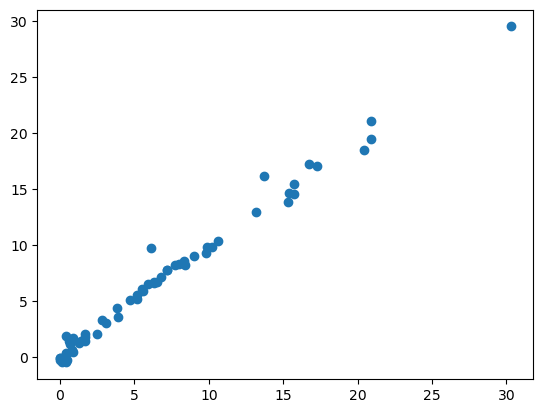

In [91]:
# Assumptions
plt.scatter(y_test, y_pred_test)

## Lasso Regression (L1 Regularization)

In [92]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, root_mean_squared_error

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("R2 Score :: ", r2_score(y_test, y_pred))

R2 Score ::  0.9492020263112388


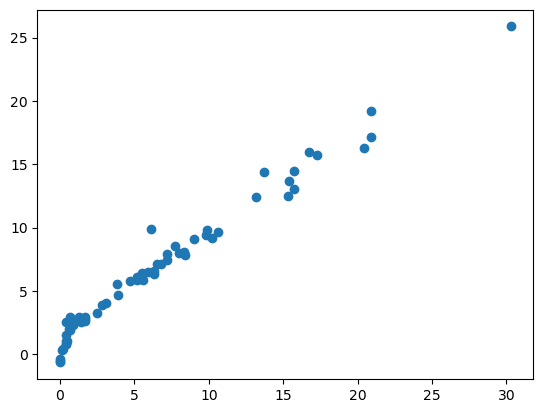

In [93]:
plt.scatter(y_test, y_pred)

# Cross Validation using Lasso

    * Datasets => Devided into test and train data 
    * Train Data => Devided into Train and Validation Dataset
    * Train Data used to training the model and validation data we will perform hyper parameter tuning
    * Training Data (1000 points) :: CV = 5 => performing hyper parameter tuning => 1000/5 = 200 Data points 
    * SO, for CV = 1 => first 800 records and 200 is validation and so on.... after training all on cv=5
    * so for every cross validation sets we can train some model and we get different accuracy final accuracy is avg of all 


In [94]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train ,y_train)
y_pred = lassocv.predict(X_test)

print("r2_score :: ", r2_score(y_test, y_pred))

r2_score ::  0.9820946715928275


In [95]:
# lassocv.alpha_ # 
# lassocv.alphas_
# lassocv.mse_path_

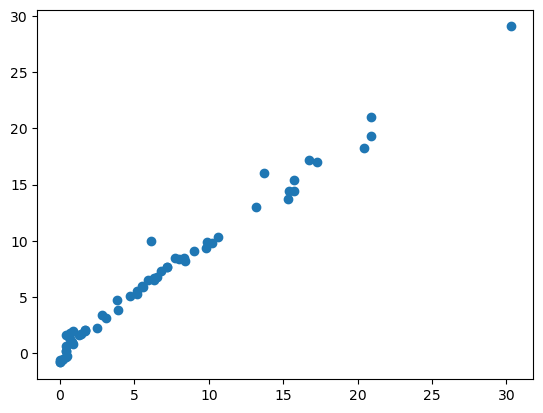

In [96]:
plt.scatter(y_test, y_pred)

# Ridge Regression (L2 Regularization)

In [97]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("R2 Score :: ", r2_score(y_test, y_pred))


R2 Score ::  0.9842993364555513


# Cross Validaiton using Ridge

In [98]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)
print("R2 Score :: ", r2_score(y_test, y_pred))

R2 Score ::  0.9842993364555513


In [99]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

# Elastic Net (Combination of Ridge and Lasso)

In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred = elasticnet.predict(X_test)
print("R2 Score :: ", r2_score(y_test, y_pred))

R2 Score ::  0.8753460589519703


# Cross Validation with Elastic net

In [101]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train, y_train)
y_pred = elasticnetcv.predict(X_test)
print("R2 Score :: ", r2_score(y_test, y_pred))

R2 Score ::  0.9814217587854941


# Model Pickling

In [102]:
scaler

StandardScaler()

In [103]:
ridge

Ridge()

In [104]:
import pickle

pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(ridge, open("ridge.pkl", "wb"))


# Using Pickle File (End to End Ml Implementation)
            Algerian Fire Datasets